<IPython.core.display.Javascript object>


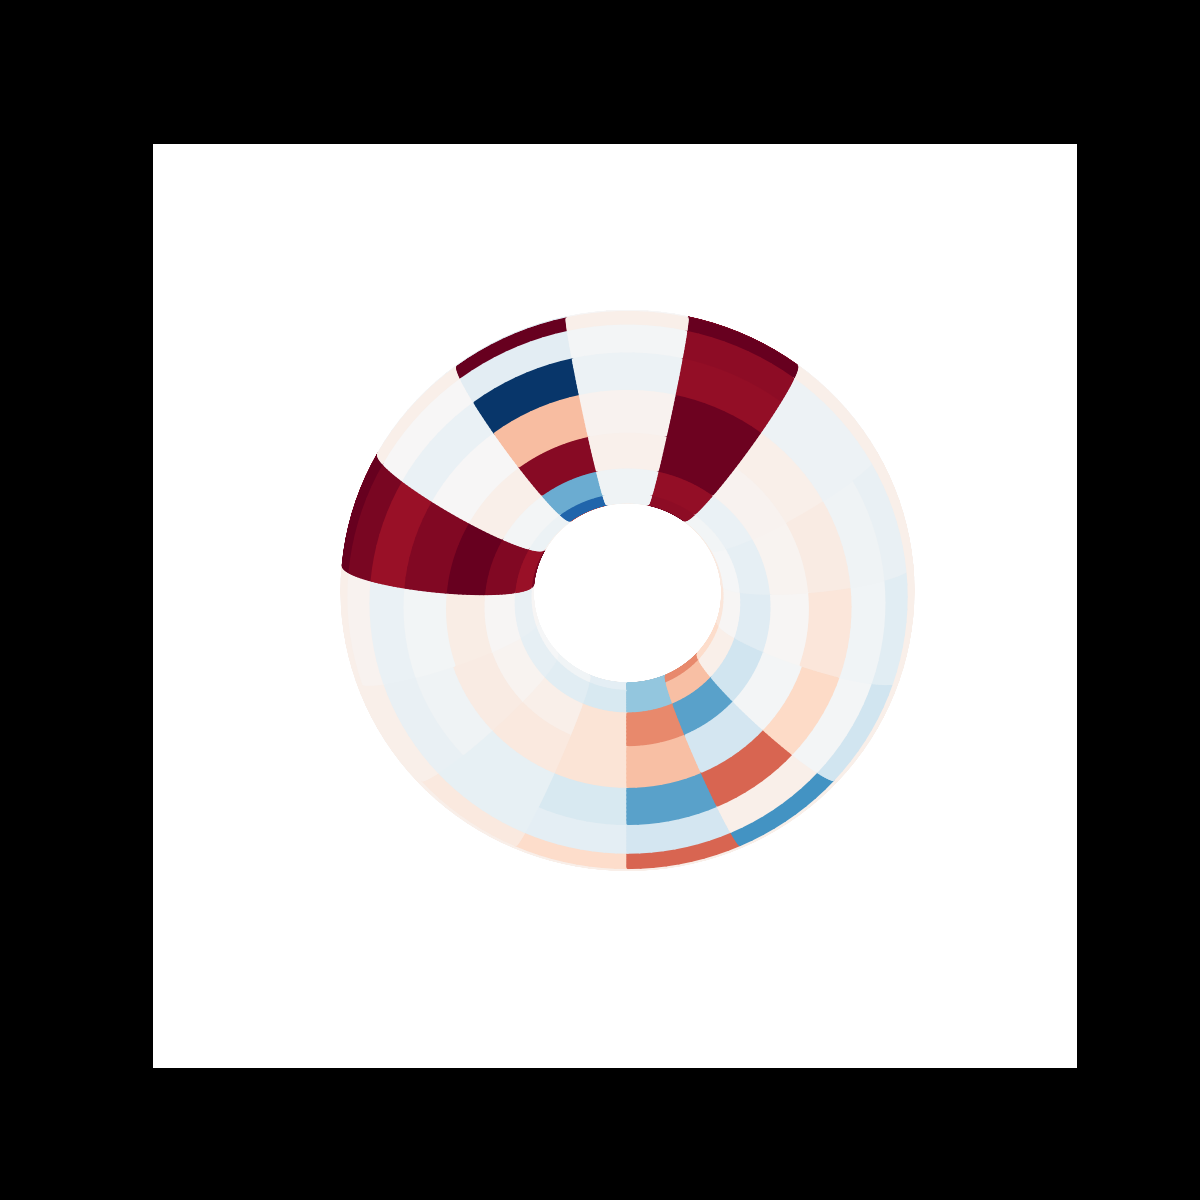

Enter the number of dimensions: 15
Enter the first state index: 3
Enter the second state index: 7


In [4]:
# make program interactive
%matplotlib notebook

# import libraries
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from random import randint

# set black background
fig = plt.figure(facecolor="Black")
# set 3D plot type
ax = plt.axes(projection="3d")
# remove axis labels
plt.axis("off")
# set figure size
plt.rcParams['figure.figsize'] = (6, 6)
# square root of the number of points that make up each cell
segments = 10
anglesList = []
# r is the radius of the tube/ring
# R is the radius of torus from the centre of the figure to the centre of the ring
r, R = 1.0, 2.0
colours = ['Reds', 'Blues']

# function that accepts a density matrix and returns wigner function (array of values) over a d x d toroidal lattice phase space
def Wigner(rho):
    d = np.shape(rho)[0]
    root_d = np.exp(1j * 2 * np.pi / d)

    # build generalized Pauli X & Z matrices
    # Pauli X
    X = np.zeros((d,d), dtype=complex)
    X[0,-1] = 1
    for i in range(d-1):
        X[i+1,i] = 1

    # Pauli Z
    Z = np.zeros((d,d), dtype=complex)
    for i in range(d):
        Z[i,i] = root_d**i

    # define Weyl displacement operators from Paulis
    # function that accepts vector vec = [a, b] and returns Weyl displacement operator T_[a, b]
    def Weyl(vec):
        # extract displacement vector and enforce periodic boundary
        # (i.e. stay on the toroidal lattice)
        v1, v2 = vec
        v1 = np.mod(v1, d)
        v2 = np.mod(v2, d)

        T = root_d**(- v1 * v2 / 2) * ( np.linalg.matrix_power(Z, v1) @ np.linalg.matrix_power(X, v2) )

        return T

    # build un-displaced parity operator
    T0 = np.zeros((d,d), dtype=complex)
    for v1 in range(d):
        for v2 in range(d):
            T0 += 1/d * Weyl([v1,v2])

    # evaluate Wigner function (note the double use of v1 and v2
    # as both vectors and array indices)
    wigner = np.zeros((d,d))
    for v1 in range(d):
            for v2 in range(d):
                value = 1/d * np.trace( rho @ Weyl([v1,v2]) @ T0 @ Weyl([v1,v2]).conj().T )
                if np.abs(value.imag) < 1e-1: value = value.real
                else: raise Exception("imaginary value in Wigner function")
                wigner[v1,v2] = value

    return wigner

def main():
    # number of dimensions as user input
    dim = input("Enter the number of dimensions: ")
    dim = int(dim)
    # list index for state as user input
    stateIndex1 = input("Enter the first state index: ")
    stateIndex1 = int(stateIndex1)
    stateIndex2 = input("Enter the second state index: ")
    stateIndex2 = int(stateIndex2)
    state = np.zeros(dim, dtype=complex)
    state[stateIndex1] = 1/np.sqrt(2)
    state[stateIndex2] = 1/np.sqrt(2)
    rho = np.outer(state, np.conjugate(state))
    wigner = Wigner(rho)
    
    # updating anglesList with array of values from lowerAngle to upperAngle (number of values in the array: 'segments')
    for i in range (0, dim):
        lowerAngle = i*(2*np.pi/dim)
        upperAngle = (i+1)*(2*np.pi/dim)
        anglesList.append(np.linspace(lowerAngle, upperAngle, segments))

    # setting x, y, z scales
    ax.set_zlim3d(-3, 3)
    ax.set_ylim3d(-3, 3)
    ax.set_xlim3d(-3, 3)
    
    for j in range (0, dim):
        for k in range (0, dim):
            if wigner[k][j] > 0:
                redOrBlue = 0
            else:
                redOrBlue = 1
            theta, phi = np.meshgrid(anglesList[j], anglesList[k])
            
            # generating x, y, z coordinates for each point to be plotted
            X = (R + r*np.cos(phi))*np.cos(theta)
            Y = (R + r*np.cos(phi))*np.sin(theta)
            Z = r*np.sin(phi)
            
            # assigning a value to each cell corresponding to a colour
            wignerForColor = []
            for a in range (0, segments):
                lst = []
                for b in range (0, segments):
                    lst.append(wigner[k][j])
                wignerForColor.append(lst)
                
            color_dimension = wignerForColor
            # setting the absolute max and min from the 'wigner' density matrix
            maxx = abs(wigner).max()
            minn = -maxx
            # normallize colourmap values to fit between max and min
            norm = matplotlib.colors.Normalize(minn, maxx)
            # choose red - blue colourmap
            m = plt.cm.ScalarMappable(norm=norm, cmap='RdBu_r')
            m.set_array([])
            # assigning colours to each value
            fcolors = m.to_rgba(color_dimension)
            
            # plot point using x, y, z coordinates and colour
            ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, facecolors = fcolors, vmin=minn, vmax=maxx, shade=False)
            
    plt.show()

if __name__ == "__main__":
    main()